In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import import_ipynb
import EDA_performance_yearly

# Read dataset
file_path = "Study Case DA (1).xlsx"

In [31]:
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")

In [33]:
competencies['score'].value_counts()

score
3.0     28206
4.0     22936
2.0     17857
5.0     11523
1.0      8688
99.0      171
6.0       165
0.0       163
Name: count, dtype: int64

In [34]:
# score valid hanya 1 sampai 5
valid_values = [1, 2, 3, 4, 5]

# Filter score invalid
invalid_score_df = competencies[~competencies['score'].isin(valid_values)]

# Tampilkan semua nilai score invalid yang muncul
print("🔍 Nilai score invalid yang ditemukan:")
print(invalid_score_df['score'].unique())
print()

# Hitung jumlah nilai invalid per tahun
print("🔍 Jumlah score invalid per tahun:")
invalid_counts = invalid_score_df.groupby('year')['score'].value_counts()
print(invalid_counts)


🔍 Nilai score invalid yang ditemukan:
[nan  6. 99.  0.]

🔍 Jumlah score invalid per tahun:
year  score
2021  0.0      38
      6.0      38
      99.0     28
2022  0.0      35
      99.0     35
      6.0      29
2023  6.0      38
      99.0     37
      0.0      26
2024  0.0      38
      99.0     33
      6.0      30
2025  99.0     38
      6.0      30
      0.0      26
Name: count, dtype: int64


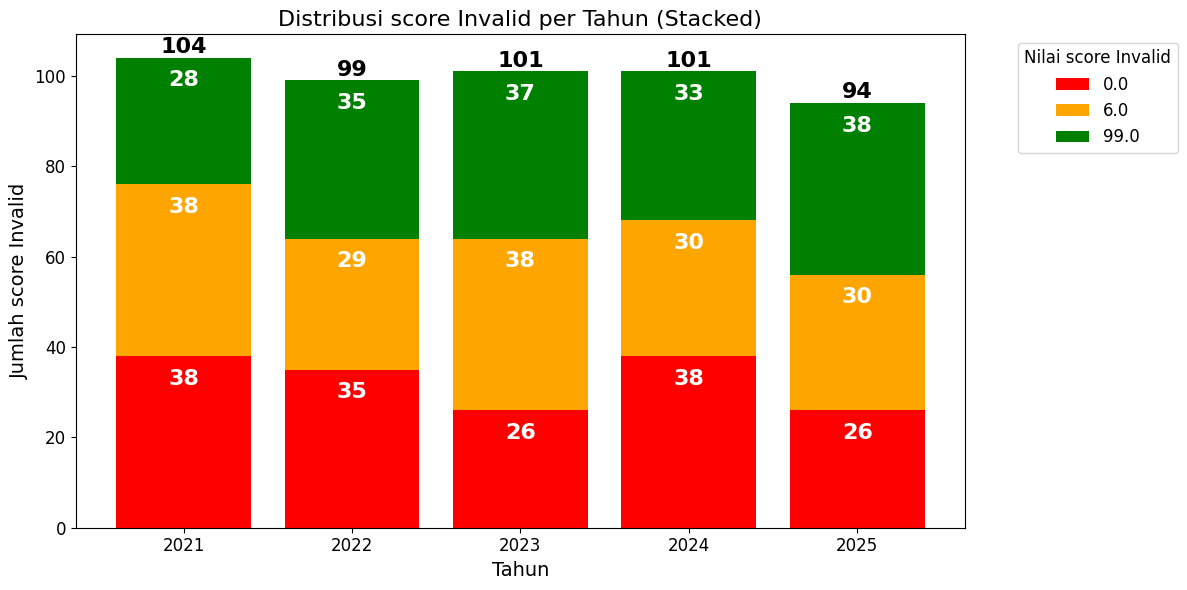

In [35]:
import matplotlib.pyplot as plt

# score valid
valid_values = [1, 2, 3, 4, 5]

# Filter score invalid
invalid_score_df = competencies[~competencies['score'].isin(valid_values)]

# Hitung jumlah invalid per tahun per nilai
invalid_pivot = invalid_score_df.groupby(['year', 'score']).size().unstack(fill_value=0)

# Urutkan index tahun
invalid_pivot = invalid_pivot.sort_index()

# Tentukan warna untuk setiap nilai invalid
unique_invalid = invalid_pivot.columns.tolist()

color_map = {}
for r in unique_invalid:
    if r == 99:
        color_map[r] = "green"
    elif r == 0:
        color_map[r] = "red"
    elif r == 6:
        color_map[r] = "orange"
    else:
        color_map[r] = None  # biarkan matplotlib pilih

# Plot stacked bar
plt.figure(figsize=(12, 6))
bottom = [0] * len(invalid_pivot)

for score in unique_invalid:
    values = invalid_pivot[score].values

    bars = plt.bar(
        invalid_pivot.index,
        values,
        bottom=bottom,
        label=str(score),
        color=color_map[score]
    )

    # Tambahkan label per stack (di dalam bar, warna putih bold)
    for bar, value, btm in zip(bars, values, bottom):
        if value > 0:  # hanya tampil jika ada nilai
            plt.text(
                bar.get_x() + bar.get_width()/2,
                btm+ value-5,
                str(int(value)),
                ha="center",
                va="center",
                color="white",
                fontsize=16,
                fontweight="bold"
            )

    bottom = [i + j for i, j in zip(bottom, values)]

# Tambahkan total di atas bar
totals = invalid_pivot.sum(axis=1)
for i, (year, total) in enumerate(totals.items()):
    plt.text(
        year,
        total + 1,
        str(int(total)),
        ha="center",
        fontsize=16,
        fontweight="bold"
    )

plt.title("Distribusi score Invalid per Tahun (Stacked)", fontsize=16)
plt.xlabel("Tahun", fontsize=14)
plt.ylabel("Jumlah score Invalid", fontsize=14)
plt.xticks(invalid_pivot.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Nilai score Invalid", fontsize=12, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [36]:
valid_values = [1, 2, 3, 4, 5]

competencies_clean = competencies[competencies['score'].isin(valid_values)].copy()


In [37]:
competencies_clean['score'].value_counts()

score
3.0    28206
4.0    22936
2.0    17857
5.0    11523
1.0     8688
Name: count, dtype: int64

In [38]:
print(competencies_clean['score'].isna().sum())

0


In [39]:
display(competencies_clean[competencies_clean['score'].isna()])

,employee_id,score,pillar_code,year


In [40]:
import pandas as pd

# Pivot dataframe
competencies_wide = competencies_clean.pivot_table(
    index=['employee_id', 'year'],  # tetapkan employee dan year sebagai index
    columns='pillar_code',          # setiap pilar jadi kolom
    values='score'                  # nilai score sebagai isi
).reset_index()                     # kembalikan index menjadi kolom biasa

# Opsional: hapus nama kolom level jika ada
competencies_wide.columns.name = None

# Tampilkan hasil
display(competencies_wide)


,employee_id,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU
0,DUP1942,2021,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
1,DUP1942,2022,3.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0
2,DUP1942,2023,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0
3,DUP1942,2024,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,NaN,2.0
4,DUP1942,2025,4.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9737,EMP101999,2021,4.0,3.0,NaN,4.0,3.0,4.0,4.0,4.0,4.0,NaN
9738,EMP101999,2022,2.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0
9739,EMP101999,2023,2.0,2.0,2.0,3.0,NaN,3.0,4.0,3.0,3.0,2.0
9740,EMP101999,2024,NaN,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0


In [41]:
for year in range(2021, 2025 + 1):
    df_perf = getattr(EDA_performance_yearly, f"performance_{year}")

    globals()[f"per_com_{year}"] = df_perf.merge(
        competencies_wide,
        on=['employee_id', 'year'],
        how="inner"
    )


In [42]:
per_com_2021

,employee_id,rating,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU
0,EMP100000,2.0,2021,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
1,EMP100002,2.0,2021,3.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,NaN
2,EMP100004,3.0,2021,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0
3,EMP100006,4.0,2021,4.0,NaN,4.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0
4,EMP100007,4.0,2021,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,DUP3015,4.0,2021,4.0,5.0,3.0,4.0,4.0,NaN,4.0,5.0,4.0,3.0
1543,DUP1942,1.0,2021,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
1544,DUP2096,3.0,2021,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,NaN
1545,DUP4177,4.0,2021,5.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,4.0,4.0


In [43]:
display(per_com_2021['year'].value_counts())
display(per_com_2022['year'].value_counts())
display(per_com_2023['year'].value_counts())
display(per_com_2024['year'].value_counts())
display(per_com_2025['year'].value_counts())

year
2021    1547
Name: count, dtype: int64

year
2022    1850
Name: count, dtype: int64

year
2023    1852
Name: count, dtype: int64

year
2024    1868
Name: count, dtype: int64

year
2025    1790
Name: count, dtype: int64

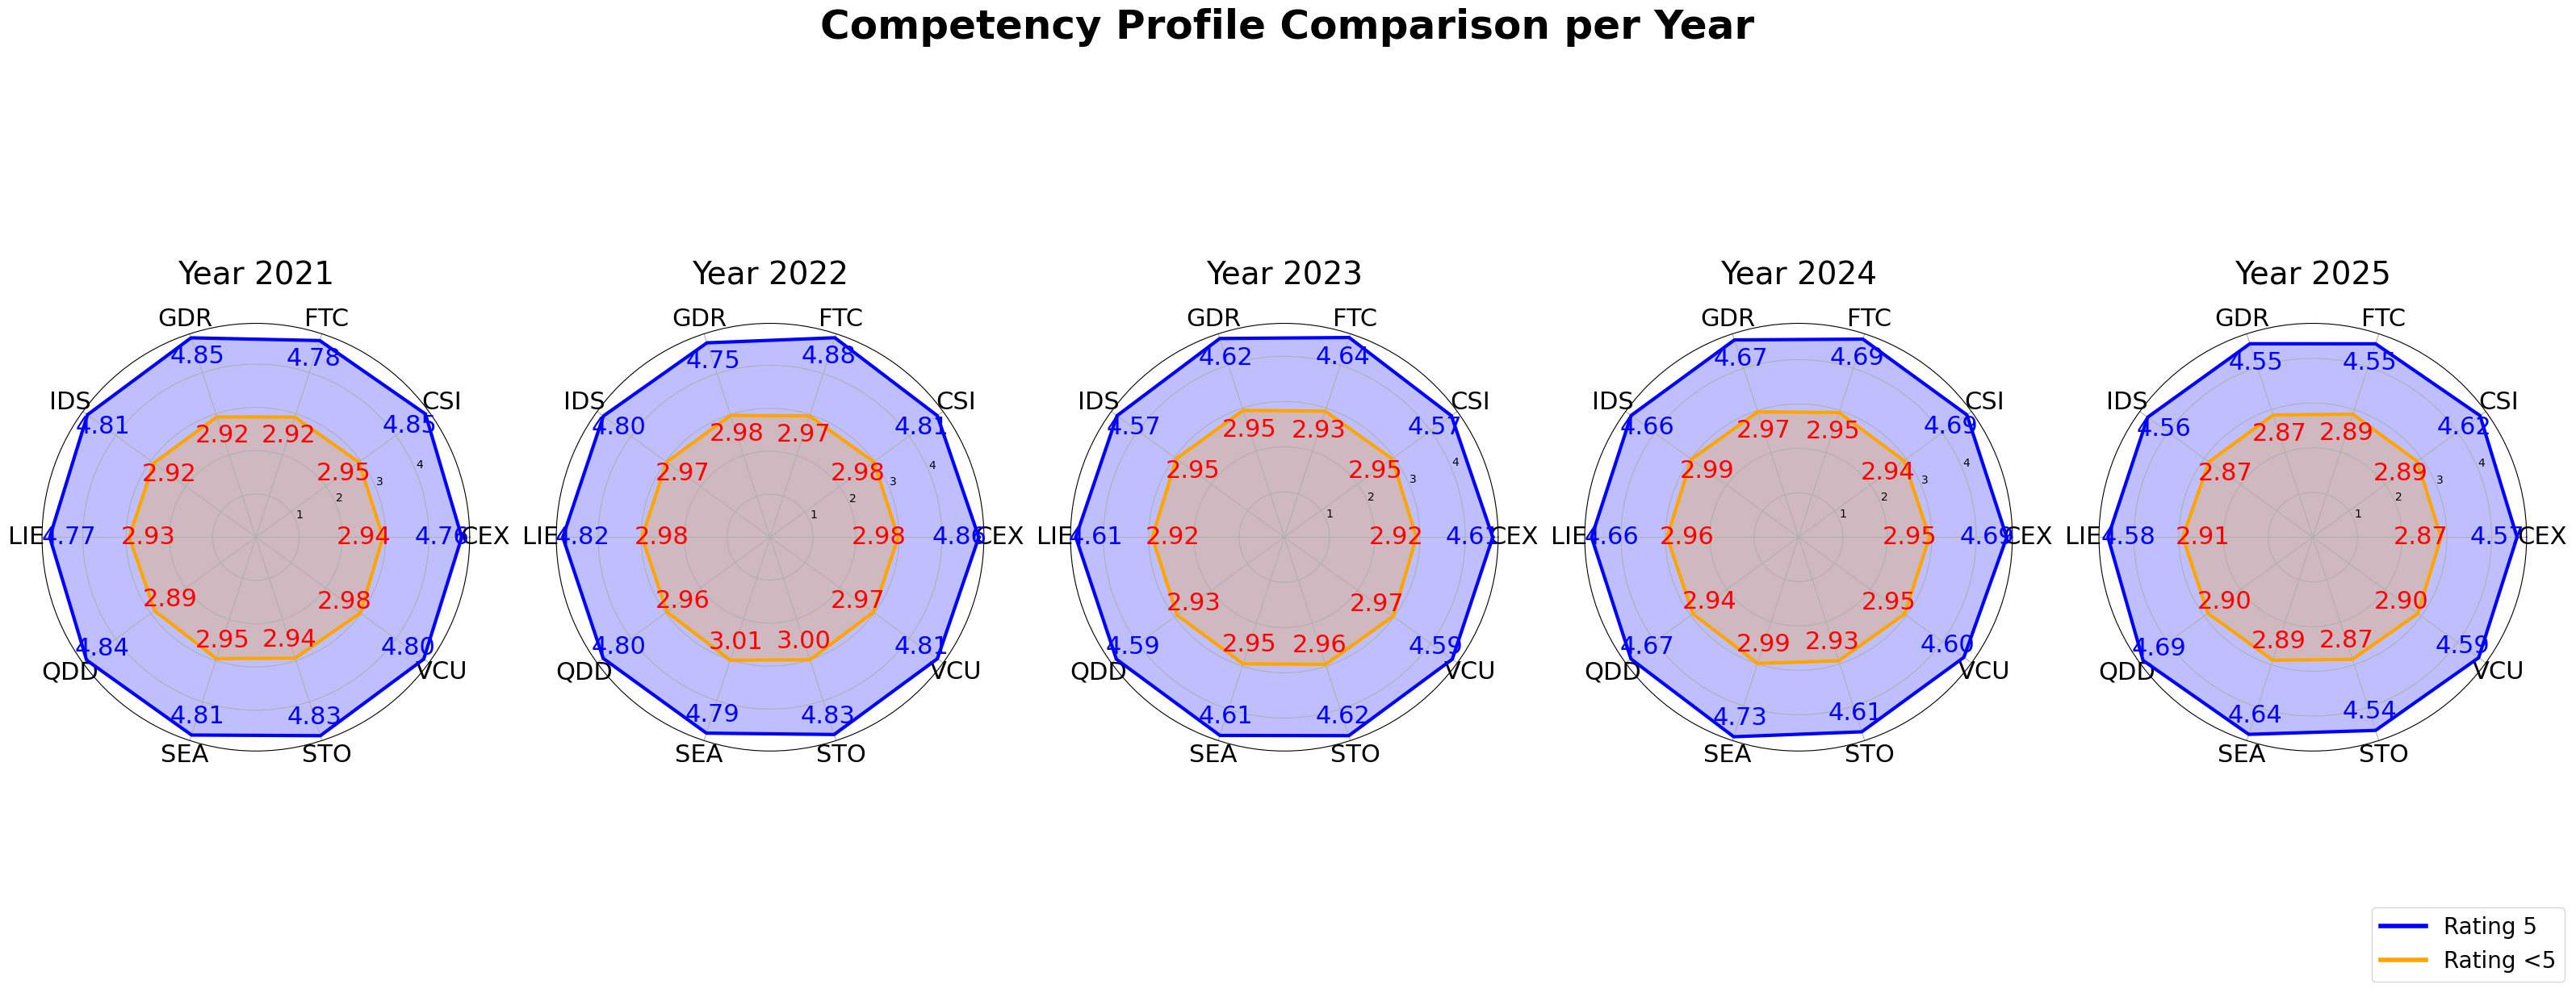

In [ ]:
from math import pi
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

competency_cols = ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']

years = [2021, 2022, 2023, 2024, 2025]
dfs = [per_com_2021, per_com_2022, per_com_2023, per_com_2024, per_com_2025]

for df, year in dfs:
    # tambahkan kolom is_high
    df['is_high'] = (df['rating'] == 5).astype(int)

N = len(competency_cols)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, axes = plt.subplots(1, 5, subplot_kw=dict(polar=True), figsize=(40*0.8,15*0.8))
axes = axes.flatten()

# Warna konsisten
color_high = 'blue'
color_low  = 'orange'

for i, (year, df) in enumerate(zip(years, dfs)):
    ax = axes[i]
    # jangan modify original df di tempat lain; buat salinan lokal
    df_local = df.copy()
    df_local['is_high'] = df_local['rating'] == 5

    avg_5 = df_local[df_local['is_high']][competency_cols].mean()
    avg_non5 = df_local[~df_local['is_high']][competency_cols].mean()

    values_5 = list(avg_5) + [avg_5[0]]
    values_non5 = list(avg_non5) + [avg_non5[0]]

    # --- Plot Rating 5 ---
    line1, = ax.plot(angles, values_5, linewidth=3, color=color_high, label='Rating 5')
    ax.fill(angles, values_5, alpha=0.25, color=color_high)

    # Tambahkan nilai (di luar garis, ukuran lebih besar, warna sama dengan line)
    for angle, value in zip(angles[:-1], values_5[:-1]):  # skip duplicate last for labels
        ax.text(angle, value - 0.45, f"{value:.2f}",
                ha='center', va='center', fontsize=22, color=color_high)

    # --- Plot Rating <5 ---
    line2, = ax.plot(angles, values_non5, linewidth=3, color=color_low, label='Rating <5')
    ax.fill(angles, values_non5, alpha=0.25, color=color_low)

    for angle, value in zip(angles[:-1], values_non5[:-1]):
        ax.text(angle, value - 0.45, f"{value:.2f}",
                ha='center', va='center', fontsize=22, color='red')

    # Label & judul
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(competency_cols, fontsize=22)
    ax.set_title(f"Year {year}", fontsize=28, pad=20)

# Hilangkan subplot kosong
for j in range(len(years), len(axes)):
    fig.delaxes(axes[j])

# Buat legend custom (pasti sesuai warna)
legend_handles = [
    Line2D([0], [0], color=color_high, lw=4),
    Line2D([0], [0], color=color_low, lw=4)
]
fig.legend(legend_handles, ['Rating 5', 'Rating <5'], loc='lower right', fontsize=20, frameon=True)

plt.suptitle("Competency Profile Comparison per Year", fontsize=36, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


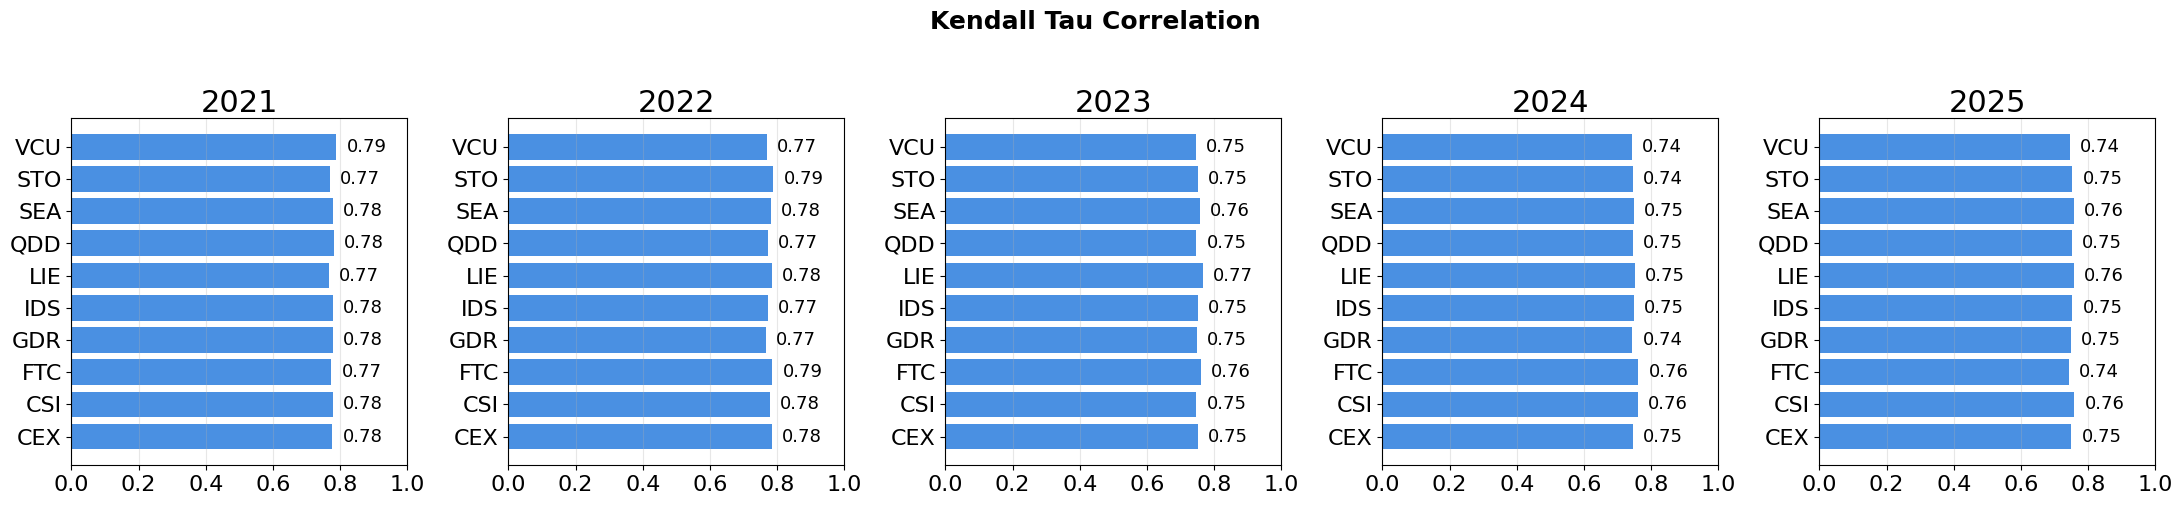

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

competency_cols = ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']
years = [2021, 2022, 2023, 2024, 2025]
dfs = {
    2021: per_com_2021,
    2022: per_com_2022,
    2023: per_com_2023,
    2024: per_com_2024,
    2025: per_com_2025
}

corr_methods = ["pearson", "spearman", "kendall"]
titles = {
    "pearson": "Pearson Correlation",
    "spearman": "Spearman Correlation",
    "kendall": "Kendall Tau Correlation"
}

# ============================================================
# Helper function to plot 5 horizontal bar subplots
# ============================================================
def plot_corr(method):
    fig, axes = plt.subplots(1, 5, figsize=(22, 5))

    for idx, year in enumerate(years):
        df = dfs[year]
        ax = axes[idx]

        # Hitung korelasi
        correlations = df[competency_cols + ['rating']].corr(method=method)['rating'][competency_cols]

        # Horizontal bar
        ax.barh(competency_cols, correlations, color="#4A90E2")

        # Tambahkan teks nilai di ujung bar
        for i, val in enumerate(correlations):
            ax.text(val + (0.03 if val >= 0 else -0.06),  
                    i,
                    f"{val:.2f}",
                    va='center',
                    fontsize=13)

        ax.set_xlim(0, 1)
        ax.set_title(f"{year}", fontsize=22, pad=2)
        ax.grid(axis='x', alpha=0.3)
        ax.tick_params(axis='y', labelsize=16)
        ax.tick_params(axis='x', labelsize=16)

    plt.suptitle(titles[method], fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0.02, 1, 0.97])
    plt.show()

# ============================================================
# Generate the 3 plots
# ============================================================
plot_corr("kendall")


In [17]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

years = [2021, 2022, 2023, 2024, 2025]
dfs = [per_com_2021, per_com_2022, per_com_2023, per_com_2024, per_com_2025]

competency_cols = ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']

ttest_results_all = {}

print("\n" + "="*60)
print("2. T-TEST: HIGH PERFORMERS VS NON-HIGH PERFORMERS (2021–2025)")
print("="*60)

for year, df in zip(years, dfs):

    print(f"\n--- YEAR {year} ---")

    df_year = df.copy()
    df_year['is_high'] = (df_year['rating'] == 5).astype(int)

    ttest_results = []

    for pillar in competency_cols:
        high_group = df_year[df_year['is_high'] == 1][pillar].dropna()
        other_group = df_year[df_year['is_high'] == 0][pillar].dropna()

        # pastikan cukup data
        if len(high_group) > 10 and len(other_group) > 10:

            # Independent T-Test (Welch)
            t_stat, p_value = ttest_ind(high_group, other_group, equal_var=False)

            # Mean difference
            mean_diff = high_group.mean() - other_group.mean()

            # Cohen’s d
            pooled_sd = np.sqrt((high_group.var() + other_group.var()) / 2)
            cohens_d = mean_diff / pooled_sd if pooled_sd != 0 else 0

            ttest_results.append({
                'Pillar': pillar,
                'High_Perf_Mean': high_group.mean(),
                'Other_Mean': other_group.mean(),
                'Mean_Difference': mean_diff,
                'T-statistic': t_stat,
                'P-value': p_value,
                'Significant': p_value < 0.05,
                'Effect_Size_Cohens_d': cohens_d,
                'High_n': len(high_group),
                'Other_n': len(other_group)
            })

    ttest_df = pd.DataFrame(ttest_results)
    ttest_df = ttest_df.sort_values("Mean_Difference", ascending=False)

    ttest_results_all[year] = ttest_df

    display(ttest_df)



2. T-TEST: HIGH PERFORMERS VS NON-HIGH PERFORMERS (2021–2025)

--- YEAR 2021 ---


,Pillar,High_Perf_Mean,Other_Mean,Mean_Difference,T-statistic,P-value,Significant,Effect_Size_Cohens_d,High_n,Other_n
6,QDD,4.836066,2.893219,1.942847,43.483873,1.519301e-144,True,2.461345,122,1283
3,GDR,4.845528,2.923434,1.922095,43.645671,1.851625e-149,True,2.426362,123,1293
1,CSI,4.845528,2.947368,1.898160,43.636628,4.911922e-146,True,2.457487,123,1292
4,IDS,4.813008,2.916473,1.896535,41.632675,2.958160e-132,True,2.423069,123,1293
8,STO,4.825397,2.939300,1.886097,41.785832,5.205738e-142,True,2.355994,126,1285
2,FTC,4.779528,2.921875,1.857653,39.389555,2.984824e-125,True,2.327313,127,1280
7,SEA,4.809160,2.953846,1.855314,40.910259,2.331398e-139,True,2.314522,131,1300
5,LIE,4.765625,2.928571,1.837054,38.544322,1.351477e-121,True,2.301060,128,1274
0,CEX,4.760000,2.939184,1.820816,37.693710,3.085988e-116,True,2.254799,125,1299
9,VCU,4.796748,2.984412,1.812336,38.467304,1.976837e-123,True,2.240947,123,1283



--- YEAR 2022 ---


,Pillar,High_Perf_Mean,Other_Mean,Mean_Difference,T-statistic,P-value,Significant,Effect_Size_Cohens_d,High_n,Other_n
2,FTC,4.879518,2.966997,1.912521,51.711810,8.457929e-234,True,2.462992,166,1515
0,CEX,4.857143,2.980237,1.876906,49.137013,6.271867e-212,True,2.398255,168,1518
5,LIE,4.823529,2.980996,1.842533,46.136482,4.134608e-189,True,2.314227,170,1526
9,VCU,4.810976,2.969757,1.841219,45.067347,5.029427e-175,True,2.317392,164,1521
6,QDD,4.798742,2.963059,1.835683,43.766410,6.871964e-164,True,2.271371,159,1543
8,STO,4.827586,3.000000,1.827586,45.981687,1.670834e-195,True,2.272693,174,1523
1,CSI,4.809524,2.984948,1.824576,44.645509,2.621598e-178,True,2.266296,168,1528
4,IDS,4.795322,2.974189,1.821132,44.502737,4.362222e-174,True,2.306171,171,1511
7,SEA,4.794118,3.010323,1.783795,43.568898,8.480203e-169,True,2.244585,170,1550
3,GDR,4.754386,2.981046,1.773340,41.545581,1.676454e-156,True,2.194198,171,1530



--- YEAR 2023 ---


,Pillar,High_Perf_Mean,Other_Mean,Mean_Difference,T-statistic,P-value,Significant,Effect_Size_Cohens_d,High_n,Other_n
2,FTC,4.642857,2.931034,1.711823,31.435169,2.895111e-101,True,1.924556,182,1508
5,LIE,4.612022,2.920366,1.691656,30.387783,3.392914e-96,True,1.885094,183,1532
0,CEX,4.610169,2.922721,1.687448,29.468972,2.867641e-90,True,1.879431,177,1514
3,GDR,4.620112,2.949837,1.670275,29.509079,9.624417e-91,True,1.872625,179,1535
7,SEA,4.610169,2.946034,1.664136,28.701570,1.005161e-87,True,1.820704,177,1538
6,QDD,4.590909,2.932181,1.658728,28.224516,6.778516e-85,True,1.834324,176,1504
8,STO,4.615385,2.957447,1.657938,30.228795,8.199813e-97,True,1.858546,182,1504
1,CSI,4.568182,2.946286,1.621895,25.976089,3.903471e-76,True,1.727650,176,1508
4,IDS,4.572222,2.952600,1.619622,27.914414,8.652656e-85,True,1.799469,180,1519
9,VCU,4.592179,2.974884,1.617294,27.321577,4.600116e-82,True,1.780867,179,1513



--- YEAR 2024 ---


,Pillar,High_Perf_Mean,Other_Mean,Mean_Difference,T-statistic,P-value,Significant,Effect_Size_Cohens_d,High_n,Other_n
1,CSI,4.687500,2.936322,1.751178,33.198239,2.508771e-107,True,1.991250,176,1539
0,CEX,4.690608,2.950262,1.740346,32.754248,9.792180e-107,True,1.972327,181,1528
2,FTC,4.691011,2.952443,1.738568,31.146751,3.926668e-97,True,1.946751,178,1535
7,SEA,4.726776,2.990170,1.736606,34.962827,1.844603e-120,True,2.009912,183,1526
6,QDD,4.666667,2.939830,1.726837,31.457727,1.550889e-100,True,1.936797,183,1529
3,GDR,4.672131,2.969993,1.702138,30.050826,6.583111e-95,True,1.866994,183,1533
5,LIE,4.662921,2.962017,1.700904,30.791549,8.908731e-97,True,1.909898,178,1527
8,STO,4.609890,2.928292,1.681598,29.298489,1.599879e-90,True,1.860151,182,1534
4,IDS,4.662857,2.987622,1.675235,28.621351,7.882002e-86,True,1.852173,175,1535
9,VCU,4.604278,2.949710,1.654568,29.600581,2.740936e-93,True,1.848603,187,1551



--- YEAR 2025 ---


,Pillar,High_Perf_Mean,Other_Mean,Mean_Difference,T-statistic,P-value,Significant,Effect_Size_Cohens_d,High_n,Other_n
6,QDD,4.691824,2.899593,1.792231,31.334806,8.598080e-93,True,2.015173,159,1474
7,SEA,4.636943,2.894596,1.742346,27.590954,1.451118e-76,True,1.897049,157,1499
1,CSI,4.625000,2.887762,1.737238,28.621173,1.209974e-80,True,1.909893,152,1479
0,CEX,4.569536,2.869478,1.700059,24.891147,6.300770e-66,True,1.787275,151,1494
4,IDS,4.564935,2.868952,1.695983,25.445618,2.505997e-68,True,1.813231,154,1488
9,VCU,4.587097,2.903989,1.683108,25.129417,8.975606e-68,True,1.785444,155,1479
3,GDR,4.550336,2.873832,1.676504,25.394454,3.690125e-67,True,1.816270,149,1498
5,LIE,4.581699,2.908968,1.672731,26.967069,2.392525e-74,True,1.851527,153,1483
8,STO,4.544304,2.872542,1.671761,24.597217,6.729137e-66,True,1.782278,158,1475
2,FTC,4.548387,2.893960,1.654427,24.676732,4.754956e-66,True,1.766592,155,1490


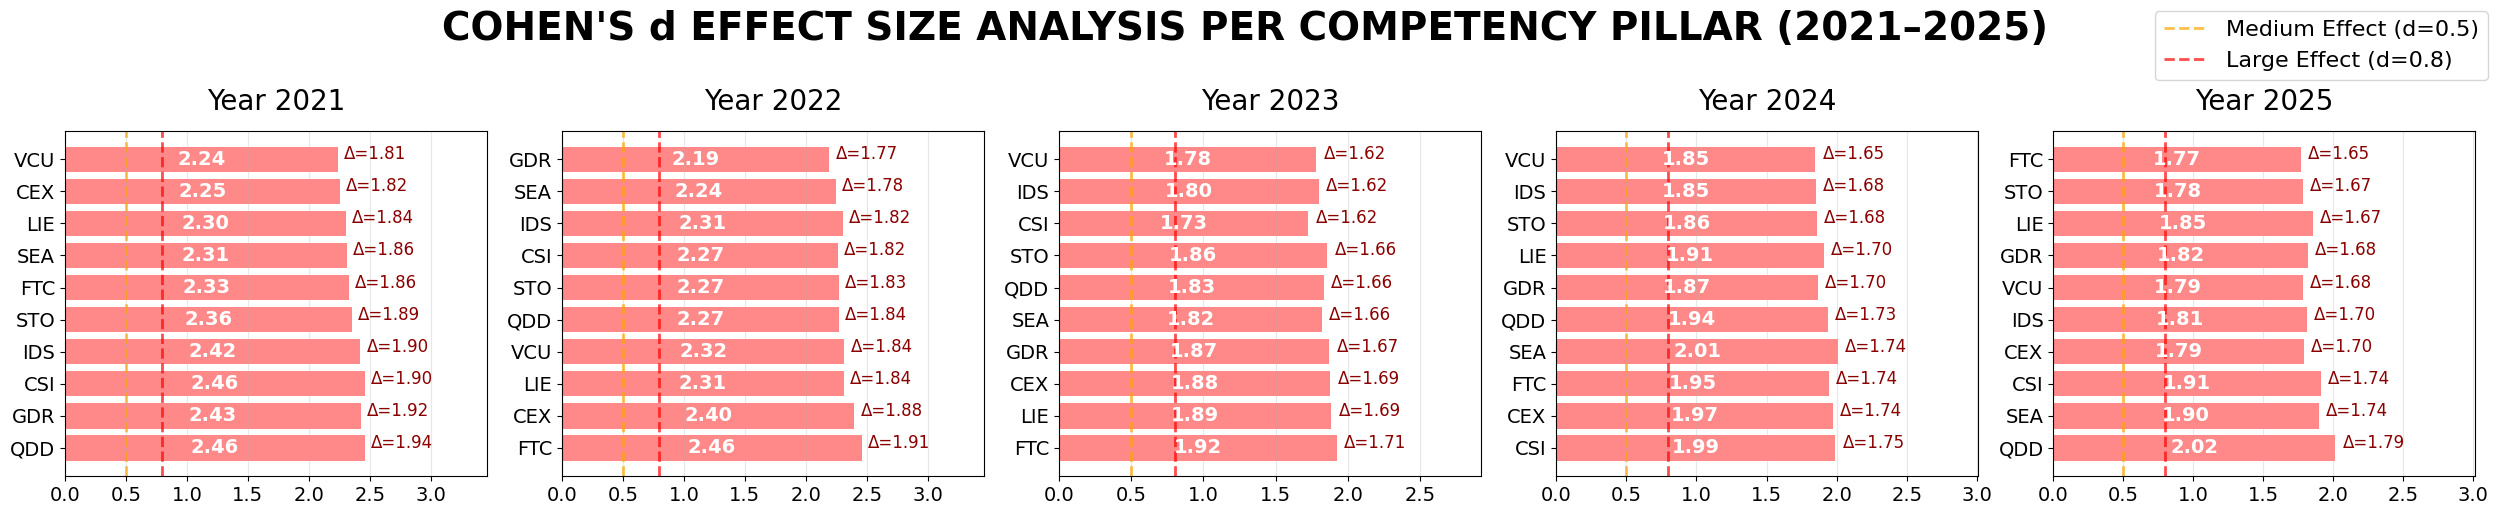

In [47]:
import matplotlib.pyplot as plt
import numpy as np

years = [2021, 2022, 2023, 2024, 2025]

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    df_year = ttest_results_all[year]

    pillars = df_year['Pillar']
    effect = df_year['Effect_Size_Cohens_d']

    ax.barh(pillars, effect, color="#FF6B6B", alpha=0.8)

    # Add effect size text inside bars
    for j, val in enumerate(effect):
        ax.text(val / 2, j, f"{val:.2f}",
                va='center', ha='center',
                fontsize=14, fontweight='bold', color='white')

        # Δ Mean di ujung bar
        ax.text(val + 0.05, j,
                f"Δ={df_year['Mean_Difference'].iloc[j]:.2f}",
                fontsize=12, color='darkred')

    # Threshold garis Cohen
    ax.axvline(0.5, color='orange', linestyle='--', alpha=0.7, linewidth=2)
    ax.axvline(0.8, color='red', linestyle='--', alpha=0.7, linewidth=2)

    ax.set_title(f"Year {year}", fontsize=20, pad=15)
    ax.set_xlim(0, max(effect) + 1)   
    ax.grid(axis='x', alpha=0.3)
    ax.tick_params(axis='both', labelsize=14)

# Legend
fig.legend(["Medium Effect (d=0.5)", "Large Effect (d=0.8)"],
           loc="upper right", fontsize=16, ncol=1)

plt.suptitle(
    "COHEN'S d EFFECT SIZE ANALYSIS PER COMPETENCY PILLAR (2021–2025)",
    fontsize=28, fontweight='bold', y=1.02
)

plt.tight_layout()
plt.show()


In [49]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

competency_cols = ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']

dfs = {
    2021: per_com_2021,
    2022: per_com_2022,
    2023: per_com_2023,
    2024: per_com_2024,
    2025: per_com_2025
}

logit_results_com = []

for year, df in dfs.items():
    df['is_high'] = (df['rating'] == 5).astype(int)
    print(f"\n========== LOGIT MODEL {year} ==========")

    X = df[competency_cols].copy()
    y = df['is_high']

    # drop missing dan drop kolom tanpa variasi
    mask = y.notna() & X.notna().all(axis=1)
    X = X.loc[mask]
    y = y.loc[mask]
    X = X.loc[:, X.nunique() > 1]  # buang kolom yang konstan

    X2 = sm.add_constant(X)

    try:
        model = sm.Logit(y, X2).fit_regularized()  # stabil

        odds = np.exp(model.params)
        top10 = odds.sort_values(ascending=False)

        logit_results_com.append({
            "Year": year,
            "n_samples": len(X2),
            "n_features": X2.shape[1],
            "params": model.params,
            "odds": odds
        })

        print(model.summary())
        print("\nOdds Ratios:")
        print(top10)

    except Exception as e:
        print(f"Model gagal untuk tahun {year}: {e}")



========== LOGIT MODEL 2021 ==========
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.618621562467424e-13
            Iterations: 79
            Function evaluations: 83
            Gradient evaluations: 79
Model gagal untuk tahun 2021: Singular matrix

========== LOGIT MODEL 2022 ==========
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.209785470227262e-12
            Iterations: 84
            Function evaluations: 86
            Gradient evaluations: 84
                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                  773
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Nov 2025   Pseudo R-squ.:                   1.000
Time:                        16:36:05   Log-Likelihoo

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif)


  feature        VIF
0     CEX  28.011535
1     CSI  27.358171
2     FTC  26.679546
3     GDR  28.325195
4     IDS  29.695590
5     LIE  29.192377
6     QDD  28.701539
7     SEA  26.769867
8     STO  29.266616
9     VCU  27.671164


In [51]:
try:
    model = sm.Logit(y, X2).fit()
except Exception as e:
    print("Error:", e)


Optimization terminated successfully.
         Current function value: 0.129557
         Iterations 10


In [52]:
import statsmodels.api as sm
import numpy as np

def logit_glm(X, y):
    """
    GLM Binomial (Logit) → lebih stabil dan menghindari perfect separation
    """
    X = sm.add_constant(X, has_constant='add')
    model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
    odds = np.exp(model.params)
    return model, odds


In [53]:
results = []

for year, df in dfs.items():
    print(f"\n========== LOGIT MODEL {year} ==========")

    X = df[competency_cols].copy()
    y = df["is_high"]

    # Filter data lengkap
    mask = y.notna() & X.notna().all(axis=1)
    X_clean = X.loc[mask].reset_index(drop=True)
    y_clean = y.loc[mask].reset_index(drop=True)

    model, odds = logit_glm(X_clean, y_clean)

    print(model.summary())
    print("\nOdds Ratios:")
    print(odds.sort_values(ascending=False))

    # simpan untuk analisis gabungan
    for comp, val in odds.items():
        results.append({"year": year, "feature": comp, "odds": val})



========== LOGIT MODEL 2021 ==========
                 Generalized Linear Model Regression Results                  
Dep. Variable:                is_high   No. Observations:                  614
Model:                            GLM   Df Residuals:                      603
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Nov 2025   Deviance:                   2.3440e-09
Time:                        16:36:05   Pearson chi2:                 1.17e-09
No. Iterations:                    30   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

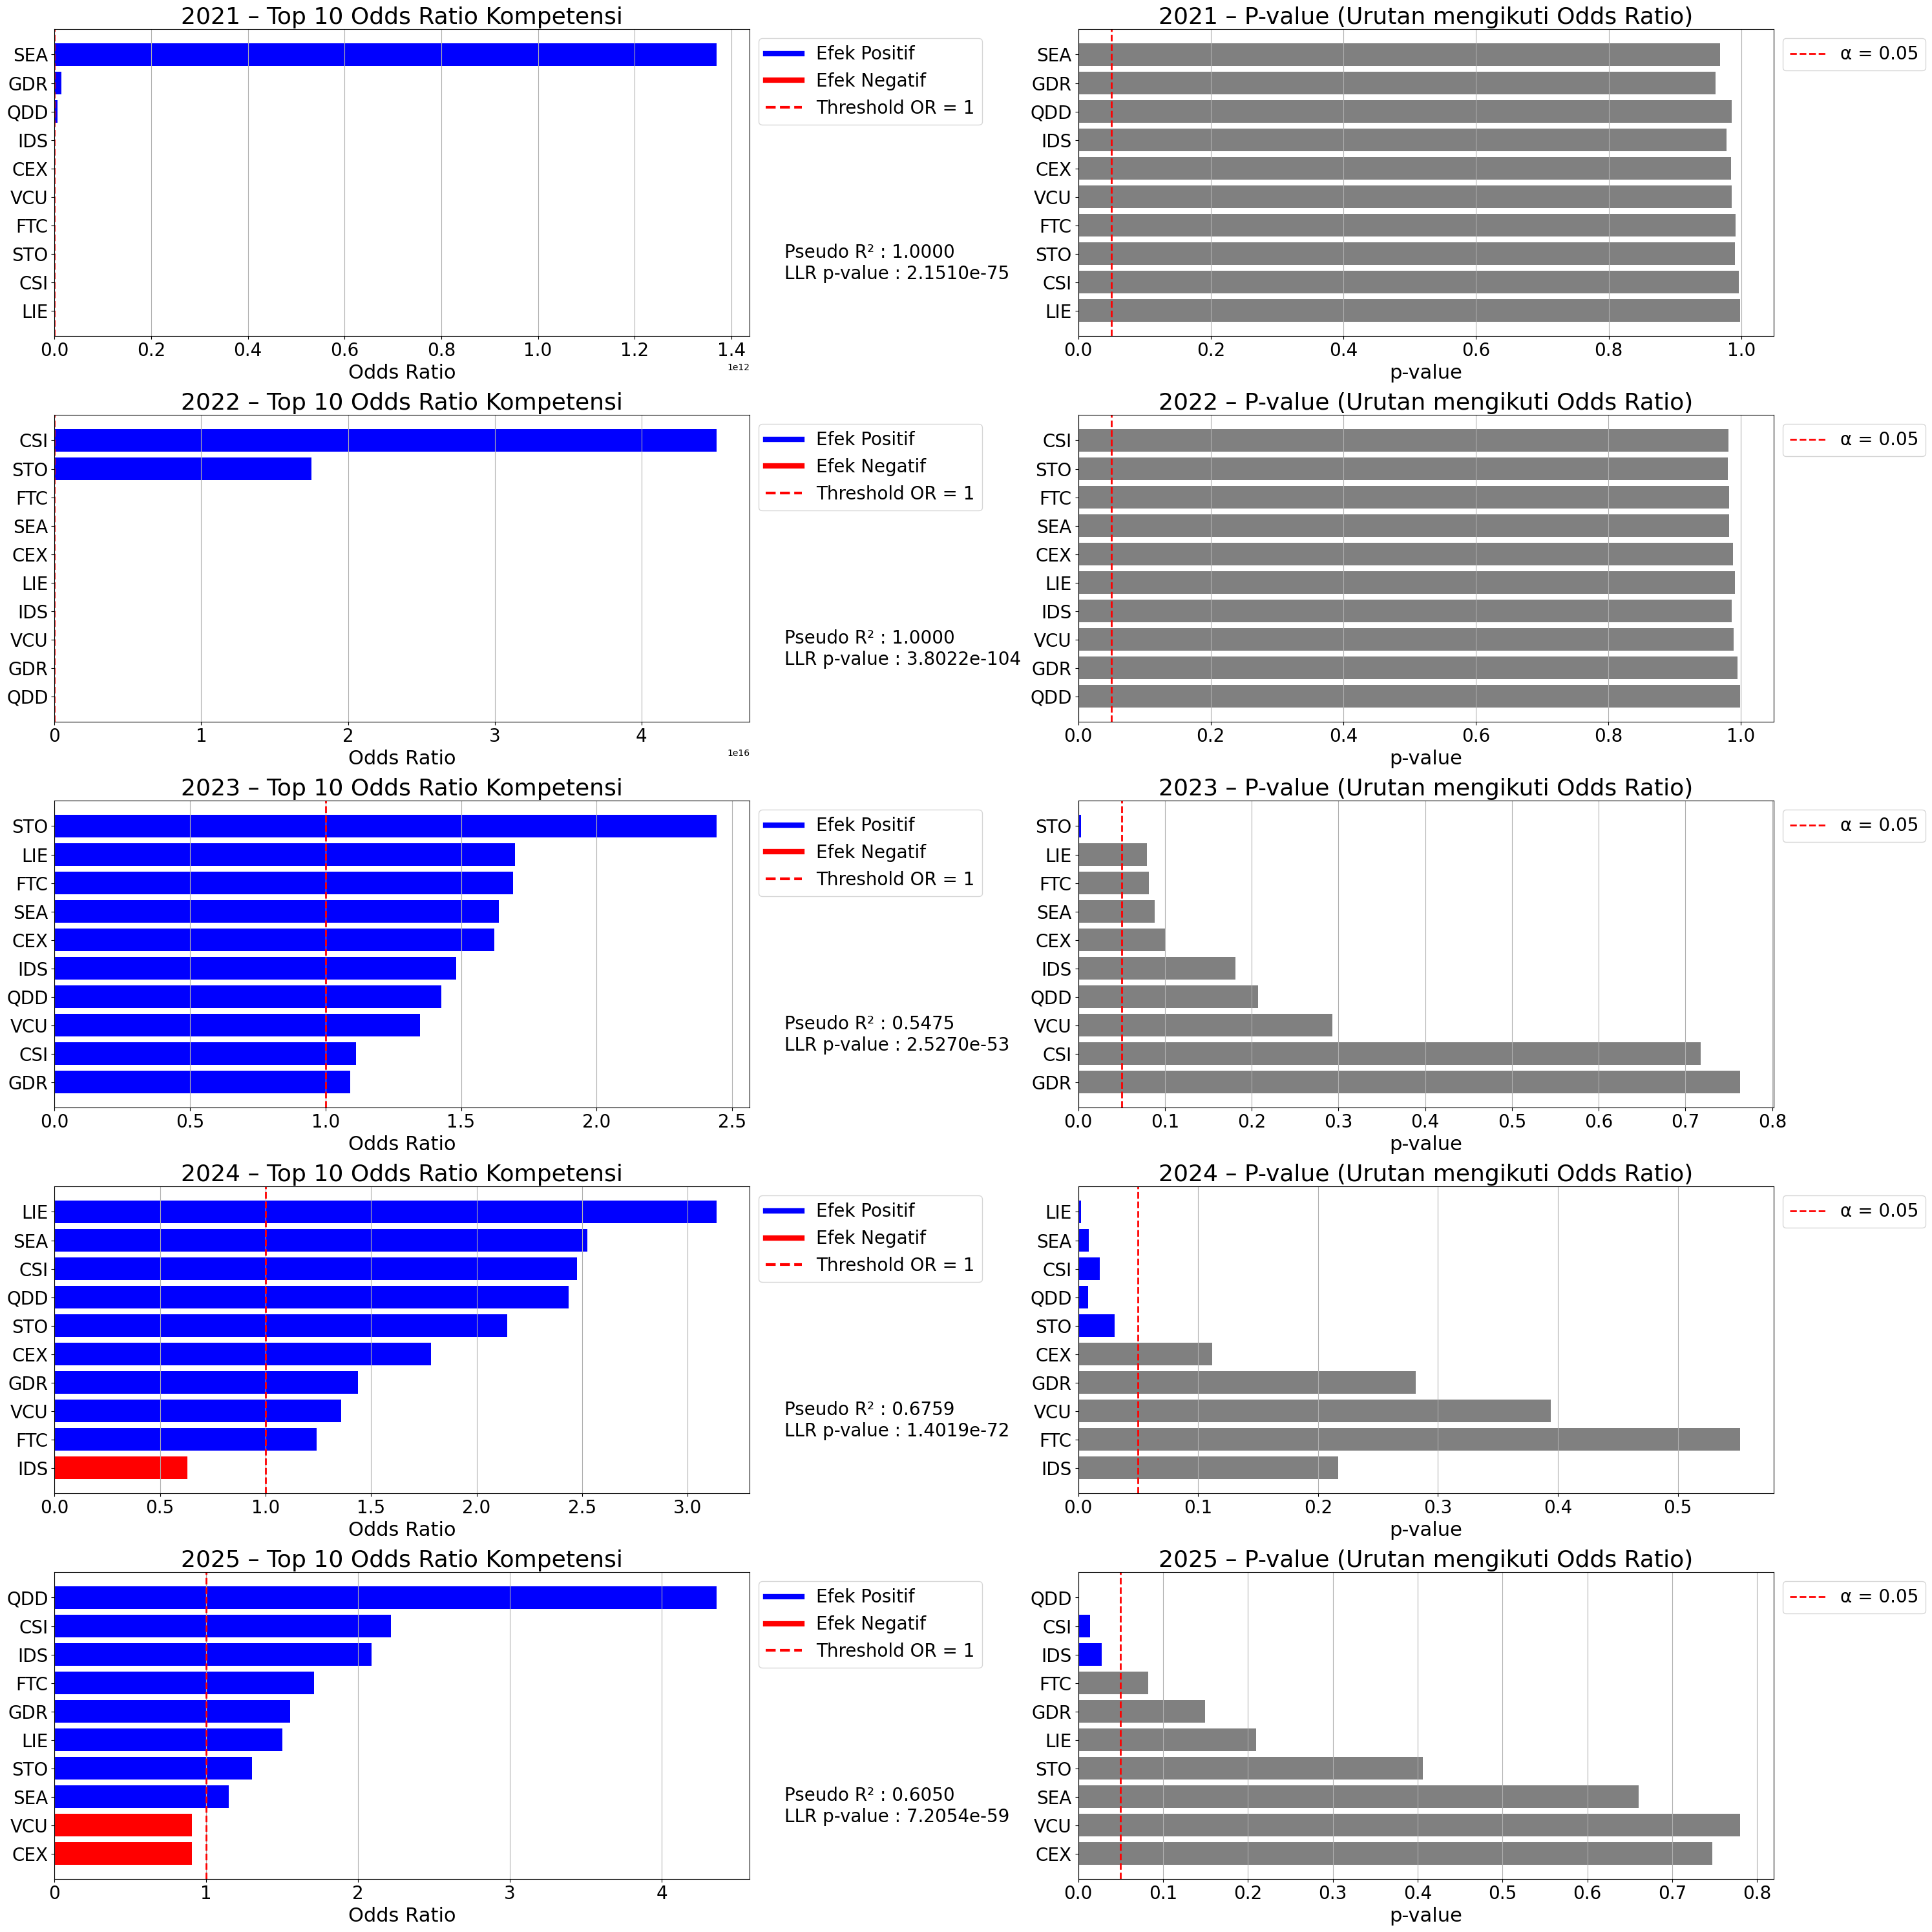

In [54]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ====================================
#   DATA INPUT
# ====================================
competency_cols = ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']

dfs = {
    2021: per_com_2021,
    2022: per_com_2022,
    2023: per_com_2023,
    2024: per_com_2024,
    2025: per_com_2025
}

summary_list = []

# ====================================
#   FIT MODEL TIAP TAHUN
# ====================================
for year, df in dfs.items():

    X = df[competency_cols].copy()
    y = df['is_high']

    # Drop NA
    mask = y.notna() & X.notna().all(axis=1)
    X2 = sm.add_constant(X.loc[mask])

    try:
        model = sm.Logit(y.loc[mask], X2).fit(disp=False)

        params = model.params.drop("const", errors="ignore")
        odds = np.exp(params)
        pvals = model.pvalues.drop("const", errors="ignore")

        summary_list.append({
            "year": year,
            "pseudo_r2": model.prsquared,
            "aic": model.aic,
            "llr_pvalue": model.llr_pvalue,
            "params": params,
            "odds": odds,
            "pvals": pvals
        })

    except Exception as e:
        print(f"❌ Model gagal untuk tahun {year}: {e}")


# ====================================
#   SUBPLOTS PER TAHUN
# ====================================
n_years = len(summary_list)
fig, axes = plt.subplots(n_years, 2, figsize=(30, 6 * n_years))

if n_years == 1:
    axes = np.array([axes])

for i, s in enumerate(summary_list):
    year = s["year"]

    # ====== TOP 10 odds ratio ======
    top_odds = s["odds"].sort_values(ascending=False).head(10)
    coef_order = top_odds.index
    coefs = s["params"][coef_order]
    pvals = s["pvals"][coef_order]

    # Warna odds (positif = biru, negatif = merah)
    odds_colors = ["blue" if c > 0 else "red" for c in coefs]

    # ===== PLOT 1 — Odds Ratio =====
    ax1 = axes[i, 0]
    ax1.barh(coef_order, top_odds.values, color=odds_colors)
    ax1.set_title(f"{year} – Top 10 Odds Ratio Kompetensi", fontsize=26)
    ax1.set_xlabel("Odds Ratio", fontsize=22)
    ax1.tick_params(axis='both', labelsize=20)
    ax1.invert_yaxis()
    ax1.grid(axis="x")

    ax1.axvline(1, color="red", linestyle="--", linewidth=2)

    legend_elements = [
        plt.Line2D([0], [0], color="blue", lw=6, label="Efek Positif"),
        plt.Line2D([0], [0], color="red", lw=6, label="Efek Negatif"),
        plt.Line2D([0], [0], color="red", lw=3, linestyle="--",
                   label="Threshold OR = 1")
    ]

    ax1.legend(handles=legend_elements, loc="upper left",
               bbox_to_anchor=(1, 1), fontsize=20)

    # Tampilkan statistik model
    summary_text = (
        f"Pseudo R² : {s['pseudo_r2']:.4f}\n"
        f"LLR p-value : {s['llr_pvalue']:.4e}"
    )
    ax1.text(
        1.05, 0.3, summary_text,
        transform=ax1.transAxes,
        fontsize=20, verticalalignment="top"
    )

    # ====== Warna p-value ======
    p_colors = ["blue" if pv <= 0.05 else "gray" for pv in pvals]

    # ===== PLOT 2 — P-value =====
    ax2 = axes[i, 1]
    ax2.barh(coef_order, pvals.values, color=p_colors)
    ax2.set_title(f"{year} – P-value (Urutan mengikuti Odds Ratio)", fontsize=26)
    ax2.set_xlabel("p-value", fontsize=22)
    ax2.tick_params(axis='both', labelsize=20)
    ax2.invert_yaxis()
    ax2.axvline(0.05, color="red", linestyle="--", linewidth=2)
    ax2.grid(axis="x")

    ax2.legend(["α = 0.05"], loc="upper left",
               bbox_to_anchor=(1, 1), fontsize=20)

plt.tight_layout()
plt.show()

In [55]:
from catboost import CatBoostClassifier
import shap
import pandas as pd
import numpy as np

competency_cols = ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']

results = {}

for year, df in dfs.items():
    print("\n" + "="*40)
    print(f"Processing YEAR {year}")
    print("="*40)

    try:
        X = df[competency_cols]
        y = (df['rating'] == 5).astype(int)

        model = CatBoostClassifier(
            iterations=400,
            depth=6,
            learning_rate=0.05,
            loss_function="Logloss",
            verbose=False
        )

        model.fit(X, y)

        # SHAP
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X)

        mean_abs_shap = np.abs(shap_values).mean(axis=0)
        result_df = pd.DataFrame({
            'competency': competency_cols,
            'mean_abs_shap': mean_abs_shap
        }).sort_values(by='mean_abs_shap', ascending=False)

        results[year] = result_df
        print(result_df)

    except Exception as e:
        print(f"Error processing year {year}:", e)

print("\nProcessing complete.")
print("Available years in results:", results.keys())



Processing YEAR 2021
  competency  mean_abs_shap
1        CSI       0.860132
3        GDR       0.710617
4        IDS       0.646173
8        STO       0.631317
5        LIE       0.516893
7        SEA       0.512374
2        FTC       0.475086
6        QDD       0.455475
9        VCU       0.426675
0        CEX       0.385762

Processing YEAR 2022
  competency  mean_abs_shap
2        FTC       0.957602
0        CEX       0.761597
8        STO       0.696626
5        LIE       0.655901
1        CSI       0.646881
4        IDS       0.624877
7        SEA       0.605839
3        GDR       0.591205
9        VCU       0.520139
6        QDD       0.443229

Processing YEAR 2023
  competency  mean_abs_shap
5        LIE       0.615988
8        STO       0.593556
4        IDS       0.581883
0        CEX       0.556306
6        QDD       0.444704
7        SEA       0.432472
2        FTC       0.430620
3        GDR       0.379052
1        CSI       0.348255
9        VCU       0.292691

Processin

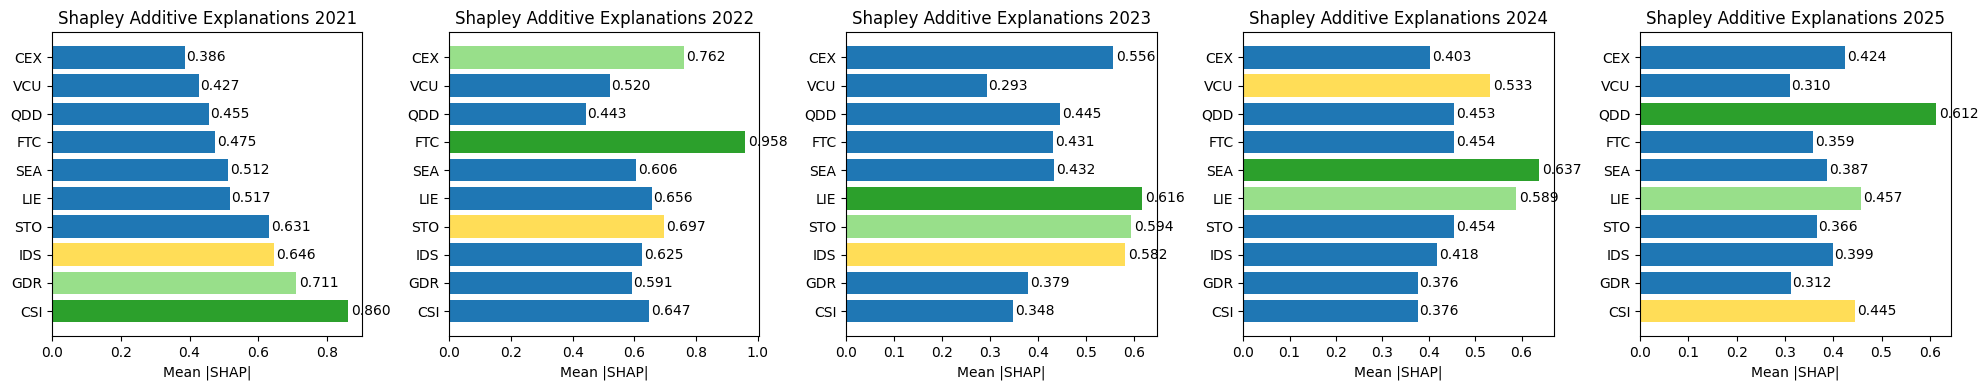

In [60]:
import matplotlib.pyplot as plt

if len(results) > 0:
    n_years = len(results)
    fig, axes = plt.subplots(1, n_years, figsize=(4*n_years, 4))

    # Style bersih
    plt.style.use("default")

    if n_years == 1:
        axes = [axes]

    # Tentukan urutan kompetensi berdasarkan salah satu tahun (misal tahun pertama)
    first_year = list(results.keys())[0]
    competency_order = results[first_year]['competency'].tolist()

    for ax, (year, df) in zip(axes, results.items()):
        # Pastikan df mengikuti urutan kompetensi yang sama
        df_ordered = df.set_index('competency').reindex(competency_order).reset_index()

        # Tentukan top 3 per tahun
        top_indices = df_ordered['mean_abs_shap'].nlargest(3).index

        colors = []
        for i in range(len(df_ordered)):
            if i == top_indices[0]:
                colors.append("#2ca02c")       # hijau
            elif i == top_indices[1]:
                colors.append("#98df8a")       # hijau kekuningan
            elif i == top_indices[2]:
                colors.append("#ffdd57")       # kuning
            else:
                colors.append("#1f77b4")       # default biru

        ax.barh(df_ordered['competency'], df_ordered['mean_abs_shap'], color=colors)
        ax.set_title(f"Shapley Additive Explanations {year}")
        ax.set_xlabel("Mean |SHAP|")

        ax.grid(False)
        ax.set_facecolor("white")

        for i, v in enumerate(df_ordered['mean_abs_shap']):
            ax.text(v + v*0.01, i, f"{v:.3f}", va="center")

    plt.tight_layout()
    plt.show()
else:
    print("No results to visualize.")
